In [1]:
# Change to Fork version of Pulser
import sys
sys.path.append('C:/Users/J64Th/Stage 3A - Jupyter/seb fork/Pulser')

In [2]:
from pulser import Register, Pulse, Sequence, Simulation
from pulser.devices import Chadoq2
from pulser.waveforms import ConstantWaveform, RampWaveform

import numpy as np
import matplotlib.pyplot as plt
import qutip

## Single Atom

Prepare a single atom:

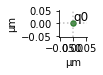

In [3]:
reg = Register.from_coordinates([(0,0)], prefix='q')
reg.draw()

Act on this atom with a Constant Pulse (a $2\pi$-pulse), such that it oscillates towards the excited Rydberg state and back to the original state:

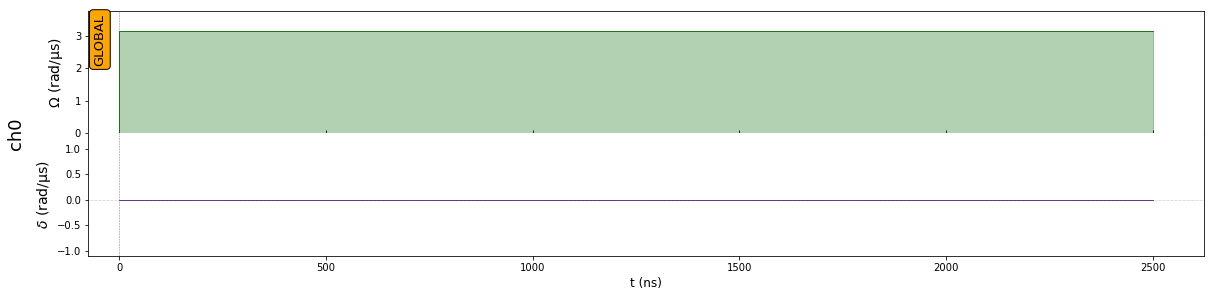

In [4]:
seq = Sequence(reg, Chadoq2)
seq.declare_channel('ch0', 'rydberg_global', 'q1')
duration = 2500
pulse = Pulse.ConstantPulse(duration, np.pi, 0.*2*np.pi, 0)
seq.add(pulse, 'ch0')
seq.draw()

In [5]:
sim = Simulation(seq, sampling_rate=0.01)
res = sim.run()

In [6]:
obs = qutip.tensor(qutip.qeye(2),
                   qutip.basis(2,0).proj(),
                   qutip.qeye(2),
                   qutip.qeye(2)) # |r><r|

obs = qutip.basis(2,0).proj()

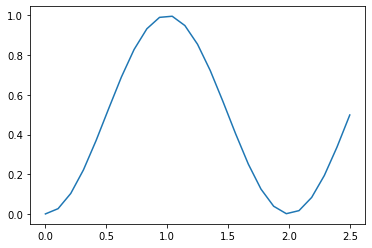

In [7]:
clean = res.expect([obs])[0]
plt.plot(sim._times, clean)

Now add SPAM errors to the simulation. You may use either `add_noise('SPAM')` or the more general `set_noise('SPAM')`.

In [8]:
sim.remove_all_noise()
sim.add_noise('SPAM')

In [9]:
sim._noise

['SPAM']

This is the spam parameters dictionary. `eta` is the probability of a badly prepared state, `epsilon` the false positive probability, `epsilon_prime` the false negative one.

In [10]:
sim.spam_dict

{'eta': 0.005, 'epsilon': 0.01, 'epsilon_prime': 0.05}

In [11]:
sim.show_config()

{'eval_t': -1, 'runs': 1, 'samples_per_run': 10, 'initial_state': Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]}


You may change different settings of the simulation. `'runs'` indicates the number of times a noisy simulation is run to obtain the average of several simulation, `'samples_per_run'` is the number of delivered samples per run - this has no physical interpretation, this is used simply to cut down on calculation time.

In [36]:
sim.config('runs', 20)
sim.config('samples_per_run', 10)
sim.config('eval_t', -1)
sim.show_config()

{'eval_t': -1, 'runs': 20, 'samples_per_run': 10, 'initial_state': Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]}


In [13]:
res = sim.run()

The new `res` instance has similar methods to the usual `SimResults` object. For example, we can calculate expectation values:

In [14]:
res.expect([obs])[0]

0.46

In [34]:
# Store original time list:
t_list = sim._times

Notice that by default the answer corresponds only to the final state of the evolution. To study the full-time dynamics with error, we indicate a specific time in the evolution with the parameter `t`.

Let us now create a function that evaluates noisy evolution for the entire time list of the simulation, and which can also accept SPAM parameters :

In [37]:
def spam_evolution(**spam_param):
    occup = []
    for i, time in enumerate(t_list):
        print(f't={time} µs...')
        sim.config('eval_t', i)
        sim.set_spam(**spam_param)
        res = sim.run()
        occup.append(res.expect([obs])[0])
    return occup

In [69]:
noisy = spam_evolution(eta=0.4)

t=0.0 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.01 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.02 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.03 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.04 µs...
faulty q0
faulty q0
faulty q0
faulty

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.321 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.331 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.341 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.351 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faul

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.642 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.652 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.662 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.672 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faul

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.973 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.983 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.993 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.003 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faul

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.284 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.294 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.304 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.314 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faul

faulty q0
faulty q0
faulty q0
t=1.605 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.615 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.625 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.635 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faul

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.936 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.947 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=1.957 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.248 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.258 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.268 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.278 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faul

Compare both clean and noisy simulations for the defaul SPAM parameters (taken from PRA_ARTICLE SPAM errors characterization)

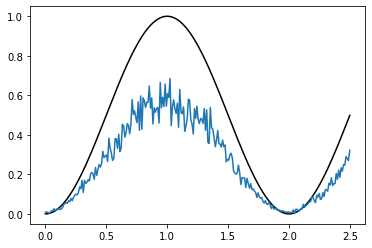

In [70]:
plt.plot(t_list, clean, 'k')
plt.plot(t_list, noisy)

Change the *SPAM* dictionary:

In [17]:
sim.set_spam(eta=0.005, epsilon=.99)
res_spam = sim.run()
res_spam.expect([obs])[0]

0.975

In [38]:
sim.set_noise('SPAM', 'doppler')
sim.config('runs', 50)

### Changing $\eta$

t=0.0 µs...
t=0.104 µs...
t=0.208 µs...
t=0.312 µs...
t=0.416 µs...
t=0.52 µs...
t=0.624 µs...
t=0.728 µs...
t=0.833 µs...
t=0.937 µs...
t=1.041 µs...
t=1.145 µs...
t=1.249 µs...
t=1.353 µs...
t=1.457 µs...
t=1.561 µs...
t=1.666 µs...
t=1.77 µs...
t=1.874 µs...
t=1.978 µs...
t=2.082 µs...
t=2.186 µs...
t=2.29 µs...
t=2.394 µs...
t=2.499 µs...
t=0.0 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.104 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.208 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
fault

faulty q0
faulty q0
t=0.312 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=0.416 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
fa

faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.082 µs...
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
faulty q0
t=2.186 µs...
fa

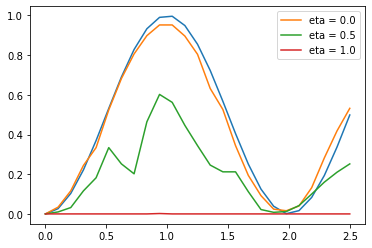

In [39]:
#plt.figure(figsize=(10,5))
plt.plot(sim._times, clean)
for eta in np.linspace(0,1,3):
    plt.plot(t_list, spam_evolution(eta=eta, epsilon=0, epsilon_prime=0), label=f'eta = {eta}')
plt.legend()

As $\eta$ grows, more qubits are not well-prepared and we stop seeing occupations at all.

### Changing $\epsilon$

t=0.0 µs...
t=0.104 µs...
t=0.208 µs...
t=0.312 µs...
t=0.416 µs...
t=0.52 µs...
t=0.624 µs...
t=0.728 µs...
t=0.833 µs...
t=0.937 µs...
t=1.041 µs...
t=1.145 µs...
t=1.249 µs...
t=1.353 µs...
t=1.457 µs...
t=1.561 µs...
t=1.666 µs...
t=1.77 µs...
t=1.874 µs...
t=1.978 µs...
t=2.082 µs...
t=2.186 µs...
t=2.29 µs...
t=2.394 µs...
t=2.499 µs...
t=0.0 µs...
t=0.104 µs...
t=0.208 µs...
t=0.312 µs...
t=0.416 µs...
t=0.52 µs...
t=0.624 µs...
t=0.728 µs...
t=0.833 µs...
t=0.937 µs...
t=1.041 µs...
t=1.145 µs...
t=1.249 µs...
t=1.353 µs...
t=1.457 µs...
t=1.561 µs...
t=1.666 µs...
t=1.77 µs...
t=1.874 µs...
t=1.978 µs...
t=2.082 µs...
t=2.186 µs...
t=2.29 µs...
t=2.394 µs...
t=2.499 µs...
t=0.0 µs...
t=0.104 µs...
t=0.208 µs...
t=0.312 µs...
t=0.416 µs...
t=0.52 µs...
t=0.624 µs...
t=0.728 µs...
t=0.833 µs...
t=0.937 µs...
t=1.041 µs...
t=1.145 µs...
t=1.249 µs...
t=1.353 µs...
t=1.457 µs...
t=1.561 µs...
t=1.666 µs...
t=1.77 µs...
t=1.874 µs...
t=1.978 µs...
t=2.082 µs...
t=2.186 µs...
t=2.29

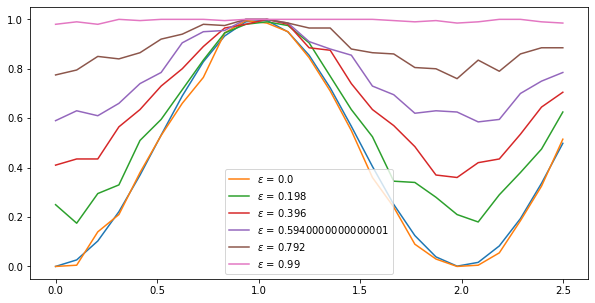

In [19]:
plt.figure(figsize=(10,5))
plt.plot(sim._times, clean)
for epsilon in np.linspace(0,.99,6):
    plt.plot(sim._times, spam_evolution(eta=0, epsilon=epsilon, epsilon_prime=0),
             label=rf'$\epsilon$ = {epsilon}')
plt.legend()

As more false negatives appear, it looks like the system is never captured, so always in a Rydberg state

### Changing $\epsilon'$

t=0.0 µs...
t=0.105 µs...
t=0.21 µs...
t=0.315 µs...
t=0.42 µs...
t=0.526 µs...
t=0.631 µs...
t=0.736 µs...
t=0.841 µs...
t=0.946 µs...
t=1.052 µs...
t=1.157 µs...
t=1.262 µs...
t=1.367 µs...
t=1.472 µs...
t=1.578 µs...
t=1.683 µs...
t=1.788 µs...
t=1.893 µs...
t=1.999 µs...
t=0.0 µs...
t=0.105 µs...
t=0.21 µs...
t=0.315 µs...
t=0.42 µs...
t=0.526 µs...
t=0.631 µs...
t=0.736 µs...
t=0.841 µs...
t=0.946 µs...
t=1.052 µs...
t=1.157 µs...
t=1.262 µs...
t=1.367 µs...
t=1.472 µs...
t=1.578 µs...
t=1.683 µs...
t=1.788 µs...
t=1.893 µs...
t=1.999 µs...
t=0.0 µs...
t=0.105 µs...
t=0.21 µs...
t=0.315 µs...
t=0.42 µs...
t=0.526 µs...
t=0.631 µs...
t=0.736 µs...
t=0.841 µs...
t=0.946 µs...
t=1.052 µs...
t=1.157 µs...
t=1.262 µs...
t=1.367 µs...
t=1.472 µs...
t=1.578 µs...
t=1.683 µs...
t=1.788 µs...
t=1.893 µs...
t=1.999 µs...
t=0.0 µs...
t=0.105 µs...
t=0.21 µs...
t=0.315 µs...
t=0.42 µs...
t=0.526 µs...
t=0.631 µs...
t=0.736 µs...
t=0.841 µs...
t=0.946 µs...
t=1.052 µs...
t=1.157 µs...
t=1.262 

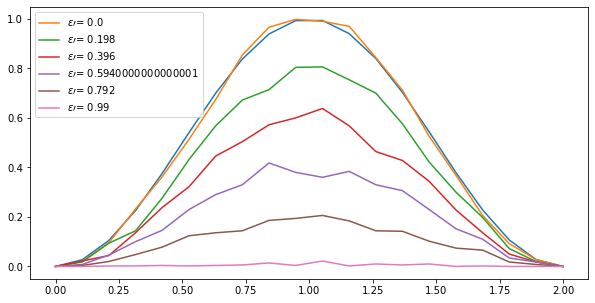

In [22]:
plt.figure(figsize=(10,5))
plt.plot(sim._times, clean)
for eps_pr in np.linspace(0,.99,6):
    plt.plot(sim._times, spam_evolution(eta=0, epsilon=0, epsilon_prime=eps_pr),
             label=rf'$\epsilon\prime$= {eps_pr}')
plt.legend()

As there are more false positives, all atoms seem to be recaptured, until no occupation is detected.

## Doppler Noise

We can add Doppler Noise to our simulation with the `add_noise('doppler')` method. Let's increase the number of runs in order to get smoother curves.

In [26]:
sim.config('runs', 70)
sim.config('samples_per_run', 1)
sim.set_noise('doppler')

You may change the standard deviation of the doppler noise, which is $k \times \sqrt{k_B T / m}$, where $k$ is the effective wavevector of the lasers, using `set_doppler_sigma`.

In [54]:
sim.set_doppler_sigma(0)
sim.init_doppler_sigma()
sim.doppler_sigma

0.7539822368615503

In [27]:
def doppler_evolution():
    occup = []
    for i, time in enumerate(t_list):
        print(f't={time} µs...')
        sim.config('eval_t', i)
        res = sim.run()
        occup.append(res.expect([obs])[0])
    return occup

t=0.0 µs...
t=0.104 µs...
t=0.208 µs...
t=0.312 µs...
t=0.416 µs...
t=0.52 µs...
t=0.624 µs...
t=0.728 µs...
t=0.833 µs...
t=0.937 µs...
t=1.041 µs...
t=1.145 µs...
t=1.249 µs...
t=1.353 µs...
t=1.457 µs...
t=1.561 µs...
t=1.666 µs...
t=1.77 µs...
t=1.874 µs...
t=1.978 µs...
t=2.082 µs...
t=2.186 µs...
t=2.29 µs...
t=2.394 µs...
t=2.499 µs...


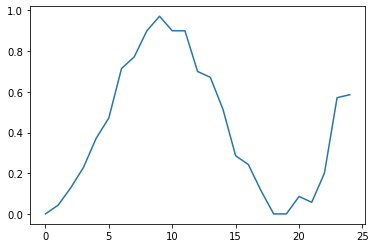

In [28]:
plt.plot(doppler_evolution())

## Multiple Atoms

We add the SPAM errors into the AFM state preparation sequence:

C:/Users/J64Th/Stage 3A - Jupyter/seb fork/Pulser\pulser\utils.py:73: UserWarning: The given duration is below the machine's precision of 4 ns time steps. It was rounded down to the nearest multiple of 4 ns.
  warnings.warn("The given duration is below the machine's precision"


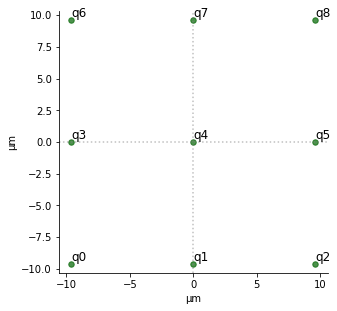

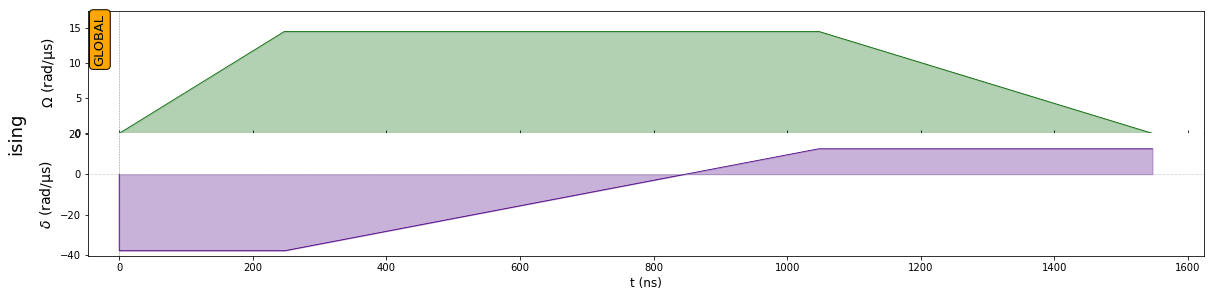

In [40]:
# Parameters in rad/µs and ns
Omega_max = 2.3 * 2*np.pi 
U = Omega_max / 2.3
delta_0 = -6 * U
delta_f = 2 * U
t_rise = 250
t_fall = 500
t_sweep = (delta_f - delta_0)/(2 * np.pi * 10) * 1000
R_interatomic = Chadoq2.rydberg_blockade_radius(U)

N_side = 3
reg = Register.rectangle(N_side, N_side, R_interatomic, prefix='q')

rise = Pulse.ConstantDetuning(RampWaveform(t_rise, 0., Omega_max), delta_0, 0.)
sweep = Pulse.ConstantAmplitude(Omega_max, RampWaveform(t_sweep, delta_0, delta_f), 0.)
fall = Pulse.ConstantDetuning(RampWaveform(t_fall, Omega_max, 0.), delta_f, 0.)

seq = Sequence(reg, Chadoq2)
seq.declare_channel('ising', 'rydberg_global')

seq.add(rise, 'ising')
seq.add(sweep, 'ising')
seq.add(fall, 'ising')

reg.draw()
seq.draw()

In [47]:
simul = Simulation(seq, sampling_rate=0.05)
clean_results = simul.run()
simul.set_noise('SPAM', 'doppler', 'amplitude')
print(simul._noise)
simul.config('runs', 50)
simul.config('samples_per_run', 10)
simul.init_spam()
spam_results = simul.run()

['SPAM', 'doppler', 'amplitude']
faulty q8
faulty q8
faulty q8
faulty q2
faulty q7
faulty q2
faulty q7
faulty q2
faulty q7
faulty q8
faulty q8
faulty q8


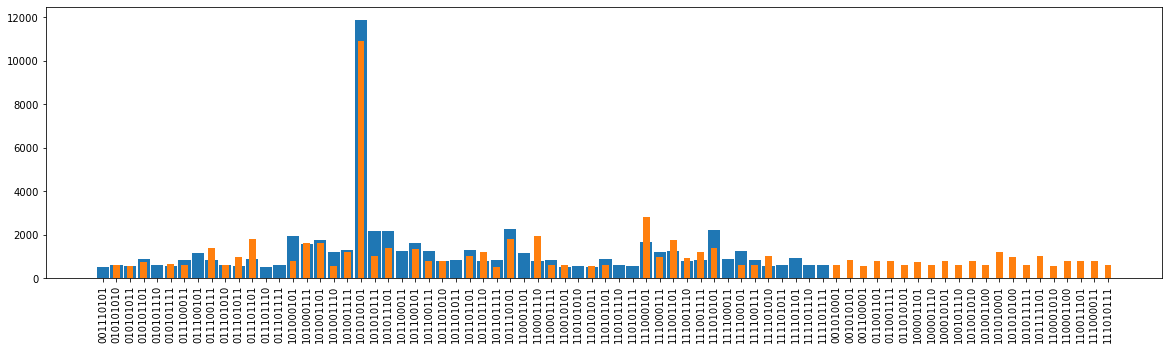

In [45]:
plt.figure(figsize=(20,5))

spam_count = spam_results.sample_final_state(meas_basis='ground-rydberg', N_samples=1e5)
clean_count = clean_results.sample_final_state(meas_basis='ground-rydberg', N_samples=1e5)

clean_most_freq = {k:v for k,v in clean_count.items() if v>500}
spam_most_freq = {k:v for k,v in spam_count.items() if v>500}

plt.bar(list(clean_most_freq.keys()), list(clean_most_freq.values()), width=0.9)
plt.bar(list(spam_most_freq.keys()), list(spam_most_freq.values()), width=0.5)

plt.xticks(rotation='vertical')
plt.show()